# 1. Descriptive statisics

## 1.1. Basic statistics

In [1]:
import numpy as np

In [2]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [3]:
sample.min()

109

In [4]:
sample.max()

996

The mean (denoted $\mu$) or the expected value (denoted $E[\mathbf{x}]$) of a variable $\mathbf{x}=(x_1,x_2,\dots, x_n)$ is calculated by the formula:

$$\mu = \frac{1}{n} \sum_{i=1}^{n}{x_i}$$

In [5]:
sample.sum()

57069

In [6]:
sample.mean()

570.69

## 1.2. Variance
$$\sigma^2 = \frac{1}{n}\sum_{i=1}^n{(x_i - \mu)}^2$$
where:
- $\sigma$: standard deviation
- $\sigma^2$: variance
- $\mu$: mean
- $n$: sample size
- $x_i$: observation number $i$

In [7]:
import numpy as np

In [8]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [9]:
# standard deviation
sample.std()

270.7422647094465

In [10]:
# variance
sample.var()

73301.37389999999

#### Variance and mean
You can calculate the variance using the mean:
$$\sigma^2 = E[(\mathbf{x} - E[\mathbf{x}])^2] = E[\mathbf{x}^2] - E[\mathbf{x}]^2$$

In [11]:
np.mean(sample**2) - np.mean(sample)**2

73301.37389999995

#### Visualization of variance
Standard deviation and variance show how spread out numbers are.

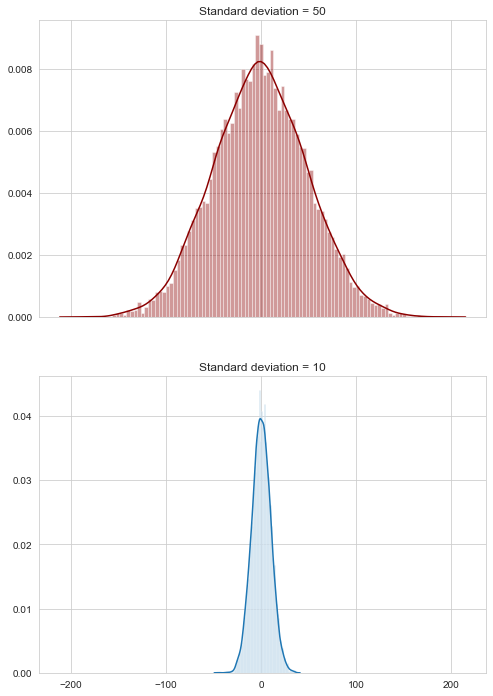

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,12))

std_1 = 50
sample_1 = np.random.normal(loc=0, scale=std_1, size=10000)
sns.distplot(sample_1, bins=100, ax=ax[0], color='darkred')
ax[0].set_title(f'Standard deviation = {std_1}')

std_2 = 10
sample_2 = np.random.normal(loc=0, scale=std_2, size=10000)
sns.distplot(sample_2, bins=100, ax=ax[1])
ax[1].set_title(f'Standard deviation = {std_2}')

plt.show()

## 1.3. Skewness and kurtosis

In [13]:
import numpy as np

In [14]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

In [15]:
from scipy.stats import skew, kurtosis

In [16]:
skew(sample)

-0.12953305970290993

In [17]:
kurtosis(sample)

-1.3208069262436632

For a normal distribution sample, skewness and kurtosis equals 0.

In [18]:
np.random.seed(0)
normal = np.random.normal(0, 1, 1000000)
print(f'Skewness = {skew(normal)}')
print(f'Kurtosis = {kurtosis(normal)}')

Skewness = -0.001361127398332973
Kurtosis = -0.0001276636003777476


## 1.4. Quantiles
Quantiles are the $q-1$ cut points dividing a set of values into $q$ subsets of equal probability. Some common $q$-quantiles are median (2-quantile), quartiles (4-quantiles), deciles (10-quantiles) and percentiles (100-quantiles).

In [19]:
import numpy as np

In [20]:
np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
sample

array([784, 659, 729, 292, 935, 863, 807, 459, 109, 823, 377, 854, 904,
       699, 170, 572, 700, 496, 414, 805, 586, 651, 187, 274, 700, 949,
       777, 637, 945, 172, 877, 215, 855, 809, 947, 531, 548, 950, 199,
       277, 855, 897, 759, 247, 523, 388, 365, 797, 739, 644, 643, 814,
       344, 251, 775, 610, 559, 982, 283, 128, 902, 228, 228, 153, 650,
       588, 856, 373, 435, 488, 717, 142, 542, 643, 988, 357, 421, 157,
       391, 970, 219, 879, 530, 182, 191, 996, 498, 711, 665, 733, 184,
       303, 424, 874, 147, 739, 231, 968, 280, 946])

#### Median
There are 50% of data points smaller the median and 50% of data point greater than the median.

In [21]:
np.median(sample)

599.0

#### Quartiles
$Q_1$, $Q_2$, $Q_3$ are the 3 quartiles that split our sample into 4 equal parts. There 25% of data points smaller than $Q_1$, 50% of the points smaller than $Q_2$ and 75% points smaller than $Q_3$. Notice that $Q_2$ is also known as the median.

In [22]:
np.quantile(sample, [0.25, 0.5, 0.75])

array([300.25, 599.  , 807.5 ])

In [23]:
# unpacking quartiles
q1, q2, q3 = np.quantile(sample, [0.25, 0.5, 0.75])

A box plot is used to visualize quartiles.

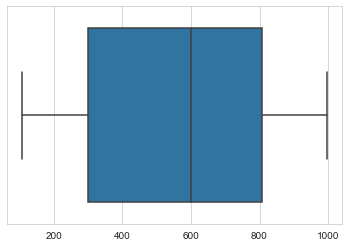

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

np.random.seed(0)
sample = np.random.randint(100, 1000, size=100)
q1, q2, q3 = np.quantile(sample, [0.25, 0.5, 0.75])

_ = sns.boxplot(sample)

#### Popular quantiles

In [25]:
np.quantile(sample, [0.05, 0.1, 0.2, 0.8, 0.9, 0.95])

array([156.8, 186.7, 269.4, 855. , 936. , 950.9])

## 1.5. Correlation coefficient

#### Covariance
First, we calculate the covariance (denoted $\sigma_{\mathbf{x},\mathbf{y}}$) of bivariate data, which is a measure of joint variability.

$$\sigma_{\mathbf{x},\mathbf{y}} =
\frac{1}{n} \sum_{i=1}^{n} {(x_i-\mu_\mathbf{x})\cdot (y_i-\mu_\mathbf{y})} =
E[(\mathbf{x}-E[\mathbf{x}])\cdot(\mathbf{y}-E[\mathbf{y}])]
$$

where $E[\mathbf{x}]$ or $E[\mathbf{y}]$ is the expected value of the corresponding variable.

The `numpy.cov()` function returns the covariance matrix of $n$ variables: $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_n$.

In [26]:
import numpy as np

In [27]:
np.random.seed(0)
X = np.random.randint(10, 100, size=10)
Y = np.random.randint(10, 100, size=10)
Z = np.random.randint(10, 100, size=10)

In [28]:
np.cov([X, Y, Z])

array([[ 659.16666667, -128.16666667,   93.5       ],
       [-128.16666667,  664.76666667,  -57.1       ],
       [  93.5       ,  -57.1       ,  823.43333333]])

#### Correlation coefficient
Correlation coefficient (denoted $\rho_{\mathbf{x},\mathbf{y}}$) is the normalized version of covariance. You can easily use the Cauchy-Schwarz inequality to proof that $\rho_{\mathbf{x},\mathbf{y}} \in [-1; 1]$. The closer the coefficient is to either -1 or 1, the stronger the correlation between the two variables.

$$\rho_{\mathbf{x},\mathbf{y}} = \frac{\sigma_{\mathbf{x},\mathbf{y}}}{\sigma_\mathbf{x} \sigma_\mathbf{y}}$$

The `numpy.corrcoef()` function returns the correlation coefficient matrix of $n$ variables: $\mathbf{x}_1,\mathbf{x}_2,\dots,\mathbf{x}_n$.

In [29]:
np.random.seed(0)
X = np.random.randint(10, 100, size=10)
Y = np.random.randint(10, 100, size=10)
Z = np.random.randint(10, 100, size=10)

In [30]:
np.corrcoef([X, Y, Z])

array([[ 1.        , -0.19361672,  0.12691115],
       [-0.19361672,  1.        , -0.07717689],
       [ 0.12691115, -0.07717689,  1.        ]])

# 2. Statistical models

## 2.1. Regression with binary dependent variable
If we use linear function with probability is dependent variable, this will not restrict $P$ to lie between 0 and 1. Then we need to use a *nonlinear function* to model the conditional probability function of a binary dependent variable. Commonly used methods are Probit and Logit regression.

#### Logit model

Logistic model is used to describe the probability of a certain class such as true/false, good/bad,.... The difference between logistic and linear regression is the output of logistic is limited in $(0,1)$.

*Logistic function is the CDF of logistically distribution:*

$$P = \frac{1}{1+e^{-(\beta_0+\beta_1.x)}}$$ 

- $P$: probability of 1 class
- $\beta_0, \beta_1$,..: parameters

Logistic function can be rewrited to *logit function*:
$$ln(\frac{p}{1-p}) = \beta_0+\beta_1.x$$

with $\frac{p}{1-p}$ is `Odds ratio`

Logit model in statistic doesn't show the effect of independent variable $x$ on $y$, it considers the influence of $x$ on the probability to $y$ get the values 1 (expected value of $y$)

#### Probit model

In probit model, the *CDF of standard normal distribution* is used to model the regression:

$$P(Y=1\vert X) = \Phi(\beta_0 + \beta_1 X_1 + \dots + \beta_k X_k)$$

- $\Phi$: The CDF of standard normal distribution
- $\beta_0 + \beta_1 X + \dots + \beta_k X_k$: quantile $z^*$ with $\Phi(z^*) = P(Z \leq z^*) \ , \ Z \sim \mathcal{N}(0,1)$


The coefficient $\beta_j$ of probit model have the same meaning with logit model.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')
import statsmodels.tools as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.discrete.discrete_model import Probit

In [47]:
df = pd.read_excel('data/logit_dataset.xlsx')
df.head()

,labor_join,chil5,chil618,age,wif_college,hus_college,log_wage,fam_income
0,1,1,0,32,0,0,1.210165,10.910001
1,1,0,2,30,0,0,0.328504,19.500000
2,1,1,3,35,0,0,1.514128,12.039999
3,1,0,3,34,0,0,0.092115,6.800000
4,1,1,2,31,1,0,1.524280,20.100000


In [48]:
y = df['labor_join']
x = df.drop(columns=['labor_join'])

In [49]:
x = sm.add_constant(x)
logit = Logit(y, x)

logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             labor_join   No. Observations:                  753
Model:                          Logit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:                  0.1209
Time:                        10:24:26   Log-Likelihood:                -452.63
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 8.923e-24
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1821      0.644      4.938      0.000       1.919       4.445
chil5          -1.4629      0.197     -7.426      0.000      -1.849      -1.077
chil618        -0.0646      0.068     -0.950      0.342      -0.198       0.069
age            -0.0629      0.013     -4.918      0.000      -0.088      -0.038
wif_college     0.8073      0.230      3.510      0.000       0.357       1.258
hus_college     0.1117      0.206      0.542      0.588      -0.292       0.516
log_wage        0.6047      0.151      4.009      0.000       0.309       0.900
fam_income     -0.0344      0.008     -4.196      0.000      -0.051      -0.018
===============================================================================
"""

Optimization terminated successfully.
         Current function value: 0.601106
         Iterations 6


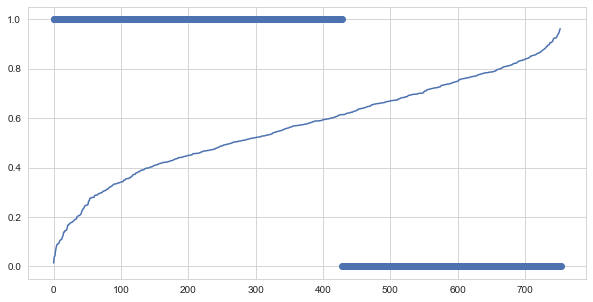

In [50]:
y_pred = logit.fit().predict(x)
plt.figure(figsize=(10,5))
plt.plot(sorted(y_pred))
plt.scatter(np.linspace(0,753,753),y)

In [51]:
probit = Probit(y, x)
probit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:             labor_join   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:                  0.1208
Time:                        10:24:26   Log-Likelihood:                -452.69
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 9.471e-24
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9184      0.381      5.040      0.000       1.172       2.664
chil5          -0.8747      0.114     -7.703      0.000      -1.097      -0.652
chil618        -0.0386      0.040     -0.953      0.340      -0.118       0.041
age            -0.0378      0.008     -4.971      0.000      -0.053      -0.023
wif_college     0.4883      0.135      3.604      0.000       0.223       0.754
hus_college     0.0572      0.124      0.461      0.645      -0.186       0.300
log_wage        0.3656      0.088      4.165      0.000       0.194       0.538
fam_income     -0.0205      0.005     -4.297      0.000      -0.030      -0.011
===============================================================================
"""

In [52]:
probit.fit().predict(x)

Optimization terminated successfully.
         Current function value: 0.601189
         Iterations 5


0      0.520697
1      0.665092
2      0.464379
3      0.659372
4      0.665338
         ...   
748    0.755185
749    0.183754
750    0.660005
751    0.338742
752    0.522859
Length: 753, dtype: float64

## 2.5. Regression with panel data (reference)

Panel data is the combination of time-series and cross-section data. Panel data is required when we want to analyse the unobserved variables which effects to dependent variable. There are 2 models to analyse panel data: *fixed effects regression* and *random effects regression*

#### Fixed effects model (FEM)

Fix effects regression:

$$Y_{it} = \beta_0 + \beta_1 X_{it} + \beta_2 Z_i +  u_{it}$$

- $Y_{it}$: dependent variable
- $X_{it}$: independent variable
- $Z_i$: unobserved variable - which different between objects but unchange across the time. 

Set $\alpha_i = \beta_0 + \beta_2 Z_i$ 

=> $$Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}$$


#### Random effects model (REM)

Random effects model is a special case of fixed effects model. The function is the same as fixed effects model but the unobserved variable is difference.
$$Y_{it} = \beta_1 X_{1,it} + \cdots + \beta_k X_{k,it} + \alpha_i + u_{it}$$

With $\alpha_i$ is representative for the factors which unobserved and change between objects but unchange across the time.

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*